In [2]:
import pandas as pd
import seaborn as sns
from scipy.stats import skew, kurtosis, shapiro
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('Source Data/Ground Truth.csv')
df.head(3)

,Sample Number,File Name,Column Count,Paragraph Count
0,1,Sample 1.pdf,2,8
1,2,Sample 2.pdf,2,7
2,3,Sample 3.pdf,1,7


In [4]:
df_1_col = df[df['Column Count']==1]
df_2_col = df[df['Column Count']==2]

In [5]:
df_1_col['Paragraph Count'].describe()
df_1 = pd.DataFrame({'Profile': df_1_col['Paragraph Count'].describe()})
df_1.to_csv('Single Column Profile.csv')

In [6]:
df_2_col['Paragraph Count'].describe()
df_2 = pd.DataFrame({'Profile': df_2_col['Paragraph Count'].describe()})
df_2.to_csv('Two Column Profile.csv')

In [7]:
df_grouped = df.groupby(['Column Count', 'Paragraph Count']).count().reset_index()
df_grouped

,Column Count,Paragraph Count,Sample Number,File Name
0,1,2,2,2
1,1,3,6,6
2,1,4,10,10
3,1,5,6,6
4,1,6,2,2
5,1,7,3,3
6,1,9,1,1
7,2,4,1,1
8,2,5,2,2
9,2,6,3,3


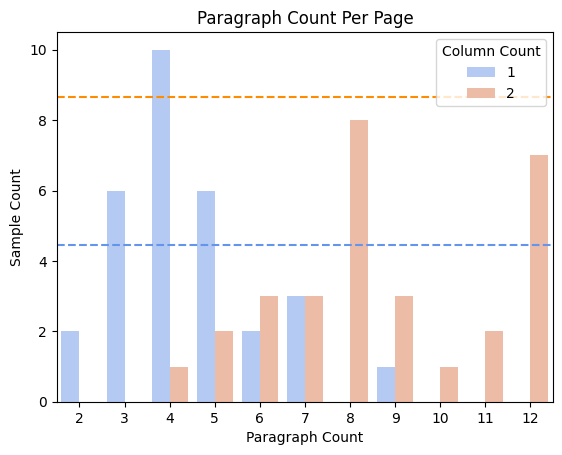

In [8]:
ax = sns.barplot(df_grouped, x="Paragraph Count", y="File Name", hue="Column Count", palette=sns.color_palette('coolwarm', n_colors=2))
ax.set(title='Paragraph Count Per Page', ylabel = "Sample Count")
sns.move_legend(ax, "upper right")

ax.axhline(y = 4.46, xmin = 0, xmax = 1,
           color = "cornflowerblue", linestyle = "dashed")

ax.axhline(y = 8.66, xmin = 0, xmax = 1,
           color = "darkorange", linestyle = "dashed");

[Text(0.5, 1.0, 'Paragraph Count Per Page')]

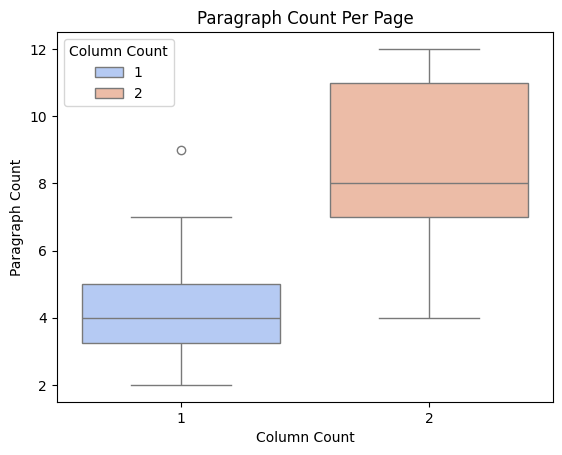

In [9]:
ax1 = sns.boxplot(data=df, x="Column Count", y="Paragraph Count", hue="Column Count", palette=sns.color_palette('coolwarm', n_colors=2))
ax1.set(title = "Paragraph Count Per Page")

In [10]:
skew(df_1_col['Paragraph Count'])

0.8706619400230845

In [11]:
kurtosis(df_1_col['Paragraph Count'])

0.6669740877006314

In [12]:
shapiro(df_1_col['Paragraph Count'])

ShapiroResult(statistic=0.9136903285980225, pvalue=0.018458161503076553)

In [13]:
skew(df_2_col['Paragraph Count'])

0.03326036765575082

In [14]:
kurtosis(df_2_col['Paragraph Count'])

-1.0490004621278766

In [15]:
shapiro(df_2_col['Paragraph Count'])

ShapiroResult(statistic=0.914696216583252, pvalue=0.019582459703087807)

[Text(0.5, 1.0, 'Paragraph Count Per Page')]

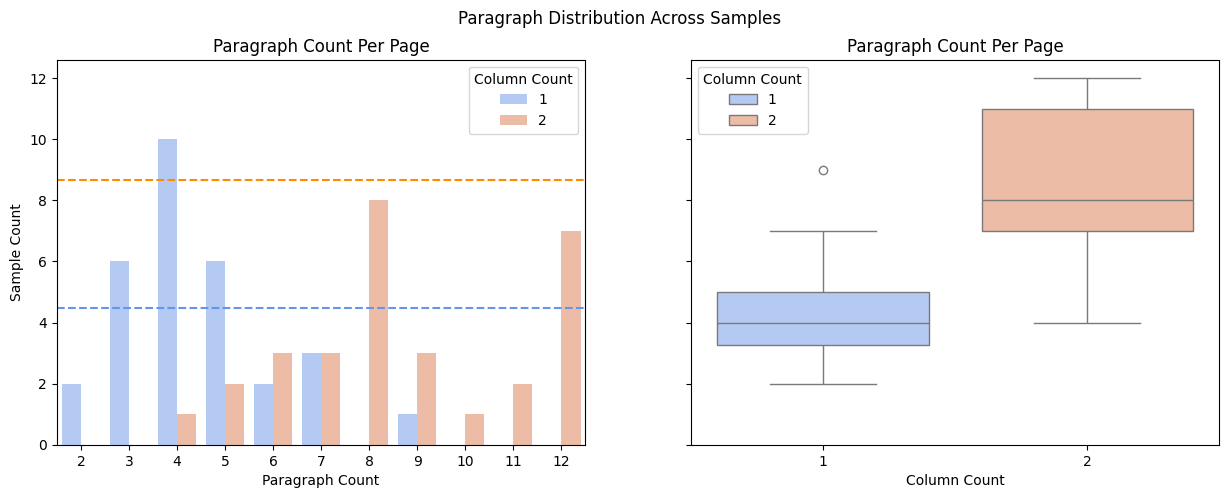

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Paragraph Distribution Across Samples')

#distribution
ax = sns.barplot(ax = axes[0], data = df_grouped, x="Paragraph Count", y="File Name", hue="Column Count", palette=sns.color_palette('coolwarm', n_colors=2))
ax.set(title='Paragraph Count Per Page', ylabel = "Sample Count")
sns.move_legend(ax, "upper right")

ax.axhline(y = 4.46, xmin = 0, xmax = 1,
           color = "cornflowerblue", linestyle = "dashed")

ax.axhline(y = 8.66, xmin = 0, xmax = 1,
           color = "darkorange", linestyle = "dashed");

#box plot
ax1 = sns.boxplot(ax = axes[1], data=df, x="Column Count", y="Paragraph Count", hue="Column Count", palette=sns.color_palette('coolwarm', n_colors=2))
ax1.set(title = "Paragraph Count Per Page")